In [102]:
import pickle
import numpy as np
import os

In [103]:
name = "lstm_pca200"
nmse_lstm_mean = []
nmse_lstms = []
leg = []

# Btot =[16, 32, 64, 128, 256, 512, 1024, 1536, 2048]
Btot =[128]
# Btot =[512, 1024, 1536]
save_path = r"C:\Users\nrazavi\Downloads\DanielResults\results"
for btot in Btot:
    nmse_lstm = np.load(os.path.join(save_path, f'nmse-{name}_Btot_{btot}.npy'))
    nmse_lstm_mean.append(np.mean(10 * np.log10(nmse_lstm)))
    nmse_lstms.append(nmse_lstm)
    leg.append(f"{name} - {btot} bits")
    
name2 = "lstm_pca80"
nmse_ref_mean = []
nmse_refs = []
for btot in Btot:
    nmse_ref = np.load(os.path.join(save_path, f'nmse-{name2}_Btot_{btot}.npy'))
    nmse_ref_mean.append(np.mean(10*np.log10(nmse_ref)))
    nmse_refs.append(nmse_ref)
    leg.append(f"{name2} - {btot} bits")

In [104]:
nmse_lstm

array([0.0932106 , 0.08170962, 0.06175599, ..., 0.20220688, 0.17701505,
       0.16058037])

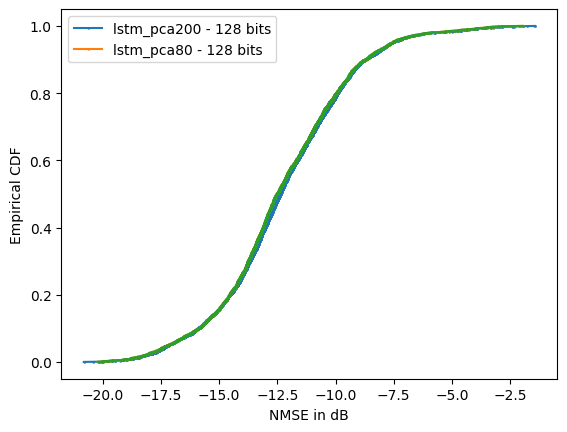

In [106]:
import matplotlib.pyplot as plt
save_path = r"C:\Users\nrazavi\Downloads\DanielResults\results"
# Btot =[16, 32, 64, 128, 256, 512, 1024, 1536, 2048]
Btot =[128]
# Btot =[512, 1024, 1536]

nmse_lstms.extend(nmse_refs)

markers = ["^","<",">","p","*"]
for i in range(len(nmse_lstms)):
    nmse = nmse_lstms[i]
    cdf_nmse = np.sort(10 * np.log10(nmse))
    # cdf_rho = np.sort(10 * np.log10(1 - rho))
    
    probabilities = np.arange(1, len(cdf_nmse) + 1) / len(cdf_nmse)
    
    if(i<5):
        plt.plot(cdf_nmse, probabilities, label='CDF 10log(NMSE)',marker=markers[1],markersize=1)
    else:
        plt.plot(cdf_nmse, probabilities, label='CDF 10log(NMSE)')

        # plt.plot(cdf_nmse, probabilities, label='CDF 10log(NMSE)')
        
    plt.xlabel('NMSE in dB')
    plt.ylabel('Empirical CDF')


plt.legend(leg)
plt.savefig(os.path.join(save_path, f'cdf_allbits.png'), dpi=300)

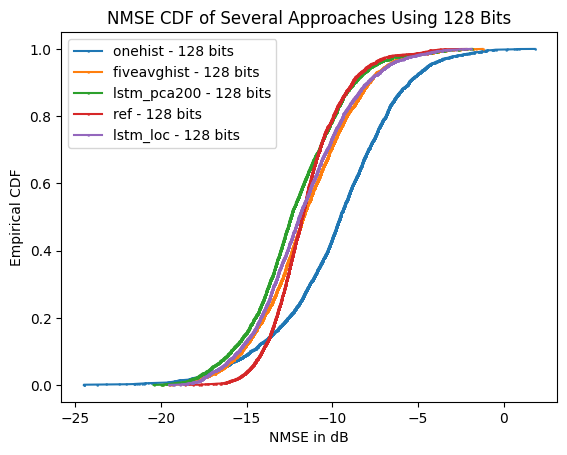

In [129]:
import numpy as np
import os
import matplotlib.pyplot as plt

save_path = r"C:\Users\nrazavi\Downloads\diffmodels"
leg = []
nmse_lstms = []

def add_plot(name, btot):
    nmse_lstm = np.load(os.path.join(save_path, f'nmse-{name}_Btot_{btot}.npy'))
    nmse_lstms.append(nmse_lstm)
    leg.append(f"{name} - {btot} bits")

add_plot("onehist", 128)
add_plot("fiveavghist", 128)
add_plot("lstm_pca200", 128)
add_plot("ref", 128)
add_plot("lstm_loc", 128)

markers = ["^","<",">","p","*"]
for i in range(len(nmse_lstms)):
    nmse = nmse_lstms[i]
    cdf_nmse = np.sort(10 * np.log10(nmse))
    # cdf_rho = np.sort(10 * np.log10(1 - rho))

    probabilities = np.arange(1, len(cdf_nmse) + 1) / len(cdf_nmse)

    if(i<5):
        plt.plot(cdf_nmse, probabilities, label='CDF 10log(NMSE)',marker=markers[1],markersize=1)
    else:
        plt.plot(cdf_nmse, probabilities, label='CDF 10log(NMSE)')

        # plt.plot(cdf_nmse, probabilities, label='CDF 10log(NMSE)')

    plt.xlabel('NMSE in dB')
    plt.ylabel('Empirical CDF')
plt.title("NMSE CDF of Several Approaches Using 128 Bits")
plt.legend(leg)



In [115]:

thing = """trainsnr0.1_testsnr0.1_windowsize25
trainsnr0.31622776601683794_testsnr0.31622776601683794_windowsize25
trainsnr1.0_testsnr1.0_windowsize25
trainsnr10.0_testsnr10.0_windowsize25
trainsnr100.0_testsnr100.0_windowsize25
trainsnr3.1622776601683795_testsnr3.1622776601683795_windowsize25
trainsnr31.622776601683793_testsnr31.622776601683793_windowsize25
trainsnr316.22776601683796_testsnr316.22776601683796_windowsize25
"""

thing = """trainsnr0.1_testsnr0.1_windowsize25
trainsnr0.31622776601683794_testsnr0.31622776601683794_windowsize25
trainsnr1.0_testsnr1.0_windowsize25
trainsnr3.1622776601683795_testsnr3.1622776601683795_windowsize25"""

thing = """trainsnr10.0_testsnr10.0_windowsize25
trainsnr31.622776601683793_testsnr31.622776601683793_windowsize25
trainsnr100.0_testsnr100.0_windowsize25
trainsnr316.22776601683796_testsnr316.22776601683796_windowsize25"""

folders = thing.split("\n")

8


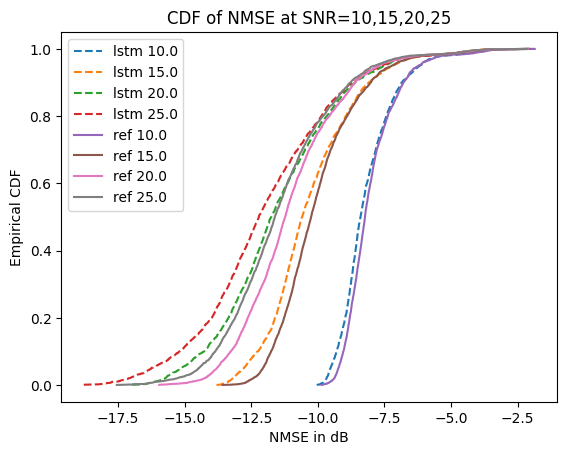

In [147]:

import matplotlib.pyplot as plt

save_path = r"C:\Users\nrazavi\Downloads\results 2\results"

def noise_add_plot(folder, name, btot):
    nmse_lstm = np.load(os.path.join(save_path, folder, f'nmse-{name}_Btot_{btot}.npy'))
    nmse_lstms.append(nmse_lstm)
    
leg = []
nmse_lstms = []
for f in folders:
    noise_add_plot(f, "lstm_pca200", 128)
    leg.append(f"lstm {np.floor(10*np.log10(float(f[8:f.find('_')])))}")
    
    
for f in folders:
    noise_add_plot(f, "reference_pca200", 128)
    leg.append(f"ref {np.floor(10*np.log10(float(f[8:f.find('_')])))}")
    
markers = ["^","<",">","p","*"]
print(len(nmse_lstms))
for i in range(len(nmse_lstms)):
    nmse = nmse_lstms[i]
    cdf_nmse = np.sort(10 * np.log10(nmse))

    probabilities = np.arange(1, len(cdf_nmse) + 1) / len(cdf_nmse)

    # plt.plot(cdf_nmse, probabilities, label='CDF 10log(NMSE)')
    if(i<4):
        plt.plot(cdf_nmse, probabilities,label='CDF 10log(NMSE)',linestyle='--')
    else:
        plt.plot(cdf_nmse, probabilities, label='CDF 10log(NMSE)')

    plt.xlabel('NMSE in dB')
    plt.ylabel('Empirical CDF')
plt.title("CDF of NMSE at SNR=10,15,20,25")
plt.legend(leg)


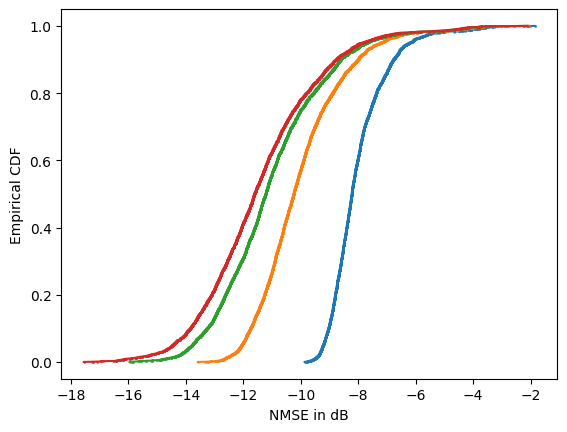

In [122]:
nmse_lstms = []
for f in folders:
    noise_add_plot(f, "reference_pca200", 128)
    


markers = ["^","<",">","p","*"]
for i in range(len(nmse_lstms)):
    nmse = nmse_lstms[i]
    cdf_nmse = np.sort(10 * np.log10(nmse))
    # cdf_rho = np.sort(10 * np.log10(1 - rho))

    probabilities = np.arange(1, len(cdf_nmse) + 1) / len(cdf_nmse)

    if(i<5):
        plt.plot(cdf_nmse, probabilities, label='CDF 10log(NMSE)',marker=markers[1],markersize=1)
    else:
        plt.plot(cdf_nmse, probabilities, label='CDF 10log(NMSE)')

        # plt.plot(cdf_nmse, probabilities, label='CDF 10log(NMSE)')

    plt.xlabel('NMSE in dB')
    plt.ylabel('Empirical CDF')


512
512


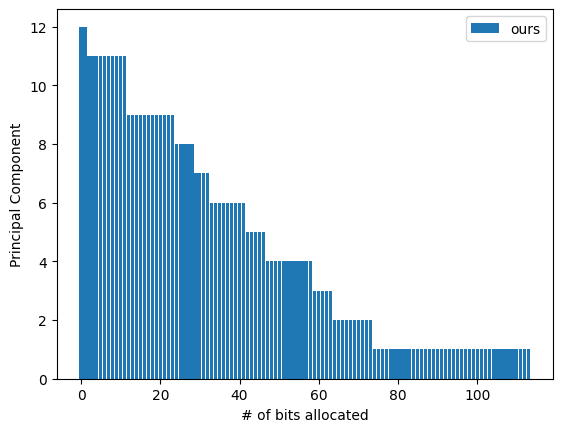

In [80]:

import matplotlib.pyplot as plt

save_path = r"C:\Users\nrazavi\Downloads\results 2\results\trainsnr10.0_testsnr10.0_windowsize25"

x = np.load(os.path.join(save_path,f'allocated_bits_lstm_pca200_Btot_512.npy'))
y = np.load(os.path.join(save_path,f'allocated_bits_reference_pca200_Btot_512.npy'))

print(np.sum(x))
print(np.sum(y))

leg = []
def plot_alloc(name, vals):
    xs = np.arange(0,len(vals))
    plt.bar(xs, vals, label=name)
    leg.append(name)


plot_alloc("ours", x)
# plot_alloc("ref", y)
plt.xlabel('# of bits allocated')
plt.ylabel('Principal Component')
plt.legend(leg)


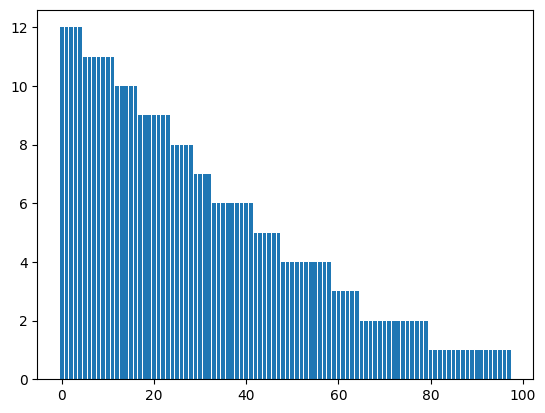

In [81]:
plot_alloc("reference", y)


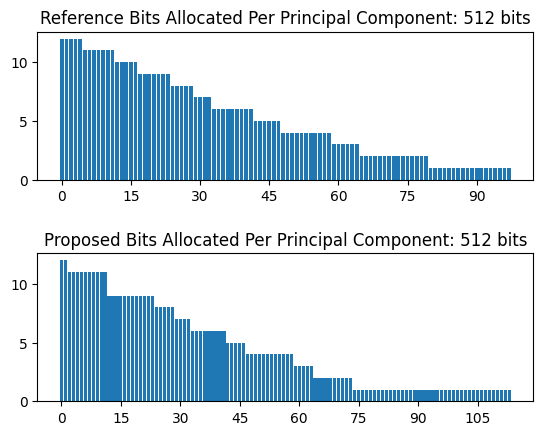

In [134]:
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib.ticker import MaxNLocator

save_path = r"C:\Users\nrazavi\Downloads\results 2\results\trainsnr10.0_testsnr10.0_windowsize25"

def modular_alloc_plots(Btot):
    figure, axis = plt.subplots(2, 1)
    plt.subplots_adjust(hspace=0.5)  # Adjust the vertical space between subplots
    vals_ref = np.load(os.path.join(save_path, f'allocated_bits_reference_pca200_Btot_{Btot}.npy'))
    vals_ours = np.load(os.path.join(save_path, f'allocated_bits_lstm_pca200_Btot_{Btot}.npy'))
    xs_ref = np.arange(0, len(vals_ref))
    xs_ours = np.arange(0, len(vals_ours))
    axis[0].bar(xs_ref, vals_ref, label="Reference")
    axis[1].bar(xs_ours, vals_ours, label="Proposed")
    axis[0].set_title(f'Reference Bits Allocated Per Principal Component: {Btot} bits')
    axis[1].set_title(f'Proposed Bits Allocated Per Principal Component: {Btot} bits')
    
    # Set x-axis ticks to integers
    axis[0].xaxis.set_major_locator(MaxNLocator(integer=True))
    axis[1].xaxis.set_major_locator(MaxNLocator(integer=True))

modular_alloc_plots(512)

